<a href="https://colab.research.google.com/github/yoon777/DACON_GBT_competition/blob/main/NLP/BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic

In [2]:
from bertopic import BERTopic
import pandas as pd

In [29]:
# 원본 CSV 파일의 "Raw" URL을 사용
extracted_text = pd.read_csv('https://raw.githubusercontent.com/young0jin/CustomsNotifyAnalyzer/refs/heads/main/NLP/extracted_text.csv')
class_table = pd.read_csv('https://raw.githubusercontent.com/young0jin/CustomsNotifyAnalyzer/refs/heads/main/%EB%B6%84%EB%A5%98%20CSV/%EC%86%8C%EB%B6%84%EB%A5%98%20%ED%85%8C%EC%9D%B4%EB%B8%94.csv')
display(extracted_text.head())
display(class_table.head())

,page,text
0,1,U.S. Customs and Border Protection ◆ DEPARTMEN...
1,2,"2 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
2,3,"3 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
3,4,"4 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
4,5,"5 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."


,index,HS-6 code,HS-10 code,MTI-6 code,소분류 품목명
0,1,870323,8703231010,741160,신차
1,2,870323,8703231020,741160,중고차
2,3,870323,8703239010,741160,신차
3,4,870323,8703239020,741160,중고차
4,5,870324,8703241010,741160,신차


In [30]:
# 'text' 열에서 'U.S.'로 시작하는 행 필터링
extracted_text['remove_text'] = extracted_text['text'].str.replace("CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO. 38, SEPTEMBER 25, 2024", "", regex=False)
filtered_rows = extracted_text[extracted_text['remove_text'].str.contains(r'(^\d+\s+)?U\.S\.', regex=True)]
filtered = extracted_text[extracted_text['remove_text'].str.contains('◆', na=False)]

# 결과 출력
filtered_rows.remove_text.head(15)

,remove_text
0,U.S. Customs and Border Protection ◆ DEPARTMEN...
1,2 SUPPLEMENTARY INFORMATION: Background The C...
2,3 restrictions under 19 U.S.C. 2602(a)(2). On...
15,"16 not limited to, plaques, stelae, memorial ..."
16,17 and promoting flexibility. CBP has determi...
17,"18 Authority: 5 U.S.C. 301; 19 U.S.C. 66, 120..."
18,19 DEPARTMENT OF THE TREASURY 19 CFR PART 12 ...
19,20 clusion of an agreement between the United...
39,40 a. Garments of the Cossack type are sewn f...
40,41 requires an agency to prepare and make ava...


In [ ]:
list_of_text = extracted_text['remove_text'].tolist()
list_of_text

In [ ]:
class_table['소분류 품목명'].unique()

In [38]:
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality (UMAP 설정 조정)
umap_model = UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with a `bertopic.representation` model
representation_model = KeyBERTInspired()

# All steps together
topic_model = BERTopic(
    embedding_model=embedding_model,          # Step 1 - Extract embeddings
    umap_model=umap_model,                    # Step 2 - Reduce dimensionality
    hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
    vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
    ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
    representation_model=representation_model # Step 6 - (Optional) Fine-tune topic representations
)

# 문서 데이터를 학습하여 토픽 추출
topics, probs = topic_model.fit_transform(list_of_text)

# 토픽 결과 확인
print("Extracted topics:", topics)

# 각 토픽에 대한 키워드 확인
topic_info = topic_model.get_topic_info()
print("\nTopic Info:\n", topic_info)

# 특정 토픽의 키워드 보기 (예: 토픽 0)
print("\nKeywords for Topic 0:")
print(topic_model.get_topic(0))

Extracted topics: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3]

Topic Info:
    Topic  Count                                           Name  \
0      0     40  0_decoration_ornaments_decorated_inscriptions   
1      1     17          1_katana_misconduct_statute_defendant   
2      2     14               2_regulations_customs_cbp_tariff   
3      3     12      3_fisheries_injunction_zealand_plaintiffs   

                                      Representation  \
0  [decoration, ornaments, decorated, inscription...   
1  [katana, misconduct, statute, defendant, compl...   
2  [regulations, customs, cbp, tariff, federal, d...   
3  [fisheries, injunction, zealand, plaintiffs, l...   

                                 Representative_Docs  
0  [31  9. Lamps and Lighting—Including, but not ..

In [ ]:
topic_info[['Representation', 'Representative_Docs']]

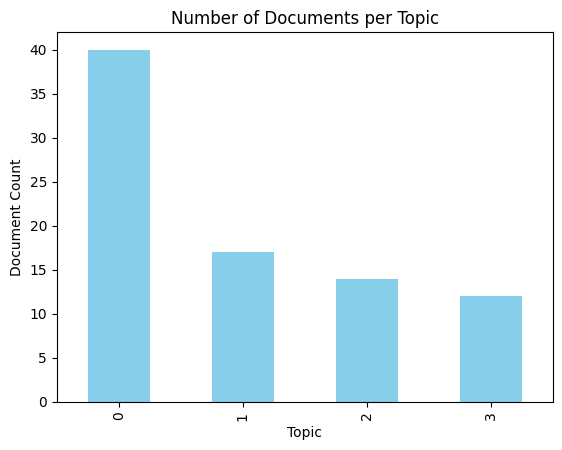

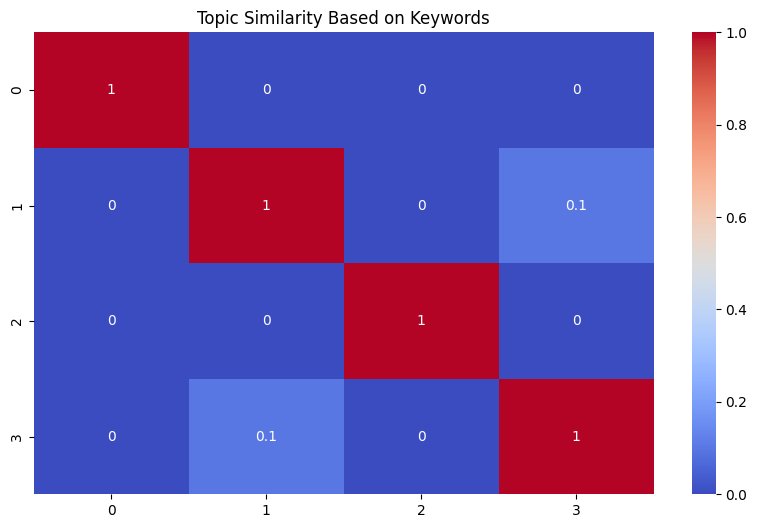

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity  # cosine_similarity 임포트

# 각 토픽의 문서 수 시각화
topic_info.set_index("Topic")["Count"].plot(kind='bar', color='skyblue')
plt.title("Number of Documents per Topic")
plt.xlabel("Topic")
plt.ylabel("Document Count")
plt.show()

# 토픽 간 키워드 유사성 히트맵
# keywords_df는 토픽 정보에서 'Representation' 컬럼을 사용
keywords_df = topic_info[['Topic', 'Representation']]
X = vectorizer_model.transform([str(rep) for rep in keywords_df['Representation']])  # 키워드를 벡터화
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_similarity(X), annot=True, cmap="coolwarm")
plt.title("Topic Similarity Based on Keywords")
plt.show()

In [51]:
# Series의 각 행을 개별적으로 처리하여 키워드 추출
def extract_legal_keywords_series(series, keywords):
    # 각 행(문자열)을 반복하면서 키워드 추출
    filtered_sentences = []
    for text in series:
        if isinstance(text, str):  # 각 행이 문자열인 경우만 처리
            sentences = text.split('. ')  # 문장 단위로 분할
            # 해당 문장 중에서 키워드가 포함된 경우만 필터링
            filtered_sentences.extend([sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)])
    return filtered_sentences

# 적용
legal_related = extract_legal_keywords_series(extracted_text['remove_text'], legal_keywords)

# 결과 출력
legal_related

['Customs and Border Protection (CBP) regulations to reflect the continuation of import restrictions on certain categories of archaeological and ethnological material of Yemen, pursuant to an agreement between the United States and the Republic of Yemen (the Agreement)',
 '2  SUPPLEMENTARY INFORMATION: Background The Convention on Cultural Property Implementation Act (Pub',
 '2601 et seq.) (CPIA), which implements the 1970 United Nations Educational, Scientific and Cultural Organization (UNESCO) Convention on the Means of Prohibiting and Preventing the Illicit Import, Export and Transfer of Ownership of Cultural Property (823 U.N.T.S',
 '231 (1972)) (Convention), allows for the con- clusion of an agreement between the United States and another party to the Convention to impose import restrictions on eligible archaeo- logical and ethnological material',
 'In certain limited circumstances, the CPIA authorizes the imposition of restrictions on an emergency basis (19 U.S.C',
 'The emergenc

In [50]:
import spacy

# spaCy 모델 불러오기 (영어 모델 사용)
nlp = spacy.load("en_core_web_sm")

# 문서 분석 및 법적 용어 추출 함수
def extract_legal_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents if entity.label_ in ("LAW", "ORG", "GPE", "LEGAL")]
    return entities

# 각 텍스트에 대해 엔티티 추출
all_entities = [extract_legal_entities(text) for text in list_of_text]

# 결과 출력
for i, entities in enumerate(all_entities):
    print(f"텍스트 {i + 1}의 법적 엔티티: {entities}")

텍스트 1의 법적 엔티티: [('U.S. Customs and Border Protection ◆ DEPARTMENT OF THE TREASURY', 'ORG'), ('CFR', 'ORG'), ('YEMEN', 'GPE'), ('U.S. Customs and Border Protection,', 'ORG'), ('Department of Homeland Security', 'ORG'), ('Department of the Treasury', 'ORG'), ('the U.S. Customs and Border Protection', 'ORG'), ('Yemen', 'GPE'), ('the United States', 'GPE'), ('the Republic of Yemen', 'GPE'), ('CBP', 'ORG'), ('Yemen', 'GPE'), ('Cargo Security', 'ORG'), ('Restricted Merchandise Branch', 'ORG'), ('Regulations and Rulings', 'ORG'), ('Office of Trade', 'ORG'), ('Trade Policy and Programs', 'ORG'), ('Office of Trade', 'ORG')]
텍스트 2의 법적 엔티티: [('Background The Convention on Cultural Property Implementation Act', 'ORG'), ('U.N.T.S.', 'GPE'), ('the United States', 'GPE'), ('Convention', 'ORG'), ('CPIA', 'ORG'), ('the State Party’s', 'ORG'), ('CPIA', 'ORG'), ('U.S. Customs and Border Protection', 'ORG'), ('CBP', 'ORG'), ('CBP Decision', 'ORG'), ('Yemen', 'GPE'), ('CPIA', 'ORG'), ('the United States', 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 설정
tfidf = TfidfVectorizer(stop_words='english', max_features=50)

# fit_transform에 직접 list_of_text 전달 (리스트로 감싸지 않음)
tfidf_matrix = tfidf.fit_transform(list_of_text)

# 피처 이름 추출
feature_names = tfidf.get_feature_names_out()

# 결과 출력
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Features:", feature_names)

TF-IDF Matrix Shape: (83, 50)
TF-IDF Features: ['12' '1592' '1774' '19' '2024' '3d' 'approximate' 'bronze' 'cbp' 'cit'
 'claim' 'coins' 'court' 'customs' 'date' 'dates' 'decorated' 'elements'
 'ethnological' 'government' 'id' 'include' 'includes' 'including'
 'information' 'judgment' 'katana' 'limited' 'material' 'motion' 'new'
 'ny' 'objects' 'painted' 'period' 'plaintiffs' 'relief' 'religious'
 'rule' 'shepherd' 'small' 'states' 'stone' 'summary' 'supp' 'types'
 'united' 'used' 'vessels' 'zealand']


 **TF-IDF 행렬의 크기 (83, 50)**은 각 문서(83개)가 50개의 주요 단어로 표현되었음을 의미

In [54]:
# 특정 패턴을 사용하여 세관 항목 추출
import re

# 세관 규제와 관련된 텍스트 패턴 설정
pattern = r"Import Restrictions on .* Material of .*"
matches = re.findall(pattern, list_of_text)

TypeError: expected string or bytes-like object